In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import seaborn as sn
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import f1_score, confusion_matrix,roc_auc_score
import matplotlib.pyplot as plt


In [ ]:
!wget https://lazyprogrammer.me/course_files/spam.csv


--2024-02-19 11:01:51--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.05s   

2024-02-19 11:01:51 (9.62 MB/s) - ‘spam.csv’ saved [503663/503663]



In [ ]:
df=pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.columns=['labels','data']

In [ ]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: >

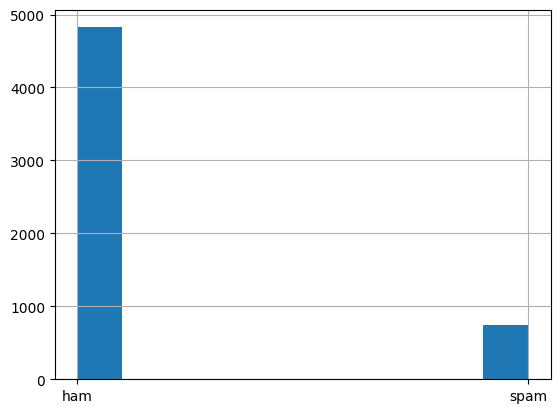

In [ ]:
df['labels'].hist()

In [ ]:
df['b_labels']=df['labels'].map({'ham':1,'spam':0})
Y=df['b_labels'].to_numpy()

In [ ]:
dftrain,dftest,Ytrain,Ytest=train_test_split(df['data'],Y,test_size=0.33)

In [ ]:
featurizer=CountVectorizer(decode_error='ignore')
Xtrain=featurizer.fit_transform(dftrain)
Xtest=featurizer.transform(dftest)

In [ ]:
Xtrain

<3733x7010 sparse matrix of type '<class 'numpy.int64'>'
	with 49488 stored elements in Compressed Sparse Row format>

In [ ]:
model=MultinomialNB()
model.fit(Xtrain,Ytrain)
model.score(Xtrain,Ytrain)
model.score(Xtest,Ytest)


0.9891245241979336

In [ ]:
ptrain=model.predict(Xtrain)
ptest=model.predict(Xtest)


In [ ]:
f1_score(Ytrain,ptrain)


0.9962871287128713

In [ ]:
f1_score(Ytest,ptest)

0.9937460913070669

In [ ]:
cm=confusion_matrix(Ytrain,ptrain)

In [ ]:
cm

array([[ 489,   14],
       [  10, 3220]])

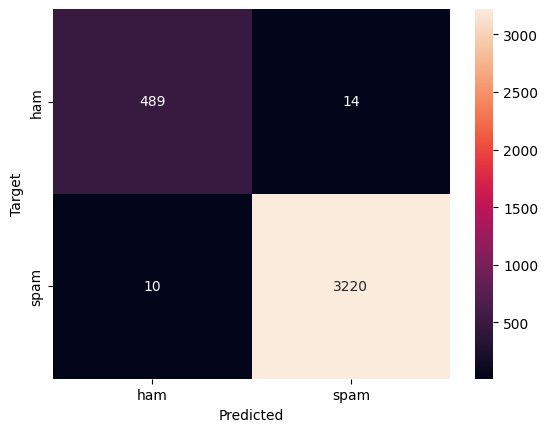

In [ ]:
def plot_cm(cm):
  classes=['ham','spam']
  df_cm=pd.DataFrame(cm,index=classes,columns=classes)
  ax=sn.heatmap(df_cm,annot=True,fmt='g')

  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [ ]:
def visualize(label):
  words=''
  for msg in df[df['labels']==label]['data']:
    msg=msg.lower()
    words +=msg + ' '
    wordcloud=WordCloud(width=600,height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [ ]:
X=featurizer.transform(df['data'])
df['predictions']=model.predict(X)

In [ ]:
sneaky_spam=df[(df['predictions']==0)& (df['b_labels']==1)]['data']
for msg in sneaky_spam:
  print(msg)


No calls..messages..missed calls
Finally the match heading towards draw as your prediction.
No calls..messages..missed calls
Yes:)from last week itself i'm taking live call.
Can u get pic msgs to your phone?
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Total video converter free download type this in google search:)
No calls..messages..missed calls
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Gettin rdy to ship comp
I liked the new mobile
Anytime...
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us


In [ ]:

not_actualy_spam=df[(df['predictions']==1)& (df['b_labels']==0)]['data']
for msg in not_actualy_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
SMS. ac sun0819 posts HELLO:\You seem cool
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
CALL 09090900040 & LISTEN TO EXTREME DIRTY LIVE CHAT GOING ON IN THE OFFICE RIGHT NOW TOTAL PRIVACY NO ONE KNOWS YOUR [sic] LISTENING 60P MIN 24/7MP 0870753331018+
Babe: U want me dont u baby! Im nasty and have a thing 4 filthyguys. Fancy a rude time with a sexy bitch. How about we go slo n hard! Txt XXX SLO(4msgs)
Guess who am I?This is the first time I created a web page WWW.ASJESUS.COM read all I w